In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 creating new column for increasing accuracy

In [7]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]

df.loc[(df.Outcome == 1) & (df.Insulin <= 100) , "Insulin"] = 70
df.loc[(df.Outcome == 0) & (df.Pregnancies >= 13 ) , "Pregnancies"] = 13

df.loc[(df.Outcome == 0) & (df.DiabetesPedigreeFunction >= 1.3 ) , "DiabetesPedigreeFunction"] = 1.3
df.loc[(df.Outcome == 0) & (df.BMI >= 50 ) , "BMI"] = 50
df["NEW_g_p"] = (df.Glucose * df.Pregnancies) 
df["NEW_i_g"] = (df.Glucose * df.Insulin)
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [8]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NEW_g_p,NEW_i_g,NewInsulinScore
0,6,148,72,35,70,33.6,0.627,50,1,Underweight,888,10360,Normal
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,85,0,Abnormal
2,8,183,64,0,70,23.3,0.672,32,1,Normal,1464,12810,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,89,8366,Normal
4,0,137,40,35,168,43.1,2.288,33,1,NaN,0,23016,Abnormal


In [9]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns
categorical_columns = [col for col in df.columns
            if len(df[col].unique()) <= 5  and col != "Outcome"]
df[categorical_columns].head()
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe
df.drop("Outcome",axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_g_p,NEW_i_g,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal
0,6,148,72,35,70,33.6,0.627,50,1,888,10360,0,1,1
1,1,85,66,29,0,26.6,0.351,31,0,85,0,1,0,0
2,8,183,64,0,70,23.3,0.672,32,1,1464,12810,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,89,8366,1,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0,23016,0,0,0


In [10]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [11]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal
0,6,148,72,35,70,33.6,0.627,50,888,10360,0,1,1
1,1,85,66,29,0,26.6,0.351,31,85,0,1,0,0
2,8,183,64,0,70,23.3,0.672,32,1464,12810,0,0,1
3,1,89,66,23,94,28.1,0.167,21,89,8366,1,0,1
4,0,137,40,35,168,43.1,2.288,33,0,23016,0,0,0


In [12]:
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [14]:

import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
y_test

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
X_test

array([[  3., 141.,   0., ...,   0.,   0.,   1.],
       [  1., 113.,  64., ...,   0.,   0.,   1.],
       [  7., 136.,  74., ...,   1.,   0.,   1.],
       ...,
       [  2., 129.,  74., ...,   0.,   0.,   0.],
       [  1., 139.,  46., ...,   1.,   0.,   1.],
       [  5., 126.,  78., ...,   1.,   0.,   1.]])

In [17]:
y_train

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [18]:
X_train

array([[ 11., 155.,  76., ...,   0.,   0.,   1.],
       [  1.,  96., 122., ...,   0.,   0.,   0.],
       [  2.,  56.,  56., ...,   0.,   0.,   1.],
       ...,
       [  1., 130.,  60., ...,   1.,   0.,   0.],
       [  4., 117.,  64., ...,   0.,   0.,   1.],
       [  4., 197.,  70., ...,   0.,   0.,   0.]])

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
machine1 = GradientBoostingClassifier()
machine1.fit(X_train,y_train)
y_pred = machine1.predict(X_test)

In [21]:
y_pred = machine1.predict(X_test)
print(y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1]


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))



[[130  16]
 [ 71  14]]


In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy for gradient classfier:", accuracy_score(Y_test,y_pred))

Accuracy for gradient classfier: 0.6233766233766234


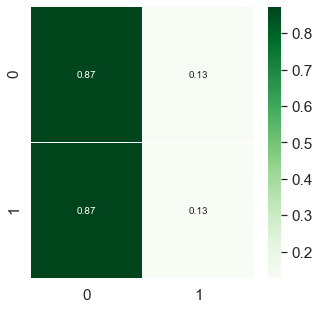

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score

for name, model in models:
    
        kfold = KFold(n_splits = 5, random_state = 150)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f " % (name, cv_results.mean())
        print(msg)

NameError: name 'models' is not defined